In [206]:
import numpy as np
import pandas as pd
import os.path
import time
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [207]:
class SVM_Pegasos:
    def __init__(self, X, y, k, init_lambda=100):
        self.k = k
        self.N, self.d = X.shape
        self.plambda = init_lambda
        self.w=np.zeros((self.d,1))
        self.convergence_path=[]
        self.build(X,y)
    
    def costs(self):
        return self.convergence_path
    
    def fsvm(self, Xp,yp): #svm primal objective function
        kp,_ = Xp.shape
        l = 1 - yp * np.dot(Xp, self.w)
        return self.plambda/2. * np.dot(self.w,self.w) + ( sum(l[l>0]) )/kp
            
    def find_weights(self, X, y): 
        lp_bound = math.sqrt(1/self.plambda)
        self.w.fill(lp_bound)
        k_tot = 1*self.N
        
        #Pegasos algorithm
        for t in range(1, k_tot):
            batch = random.sample(range(N), self.k)
            # work on batch-size of k
            At, yt =X[batch], y[batch]
            eta = 1./(self.plambda * t)
            
            l = 1 - yt * np.dot(At, self.w) # At+ are the set of samples for which w suffers non-zero loss
            cost = self.plambda/2. * self.w.T.dot(self.w) + ( sum(l[l>0]) )/self.k
            self.convergence_path.append(cost.flatten().item())
            
            indices = np.where(l>0)
            if len(indices)<1:
                print("no loss in batch selected, going for next set of samples")
                continue
                
            At_plus, yt_plus = At[indices], yt[indices]
            
            whalf = (1 - eta * self.plambda) * self.w + eta / self.k * np.dot(yt_plus, At_plus)
            
            #handle float division by zero
            if sum(whalf ** 2) < 1e-07:
                whalf = np.maximum(whalf, 1e-03)
            
            wn = whalf * np.minimum(1, 
                            1 / math.sqrt(self.plambda) /
                             math.sqrt( sum(whalf ** 2)) )
            
            
            if sum((wn - self.w) ** 2) < 1e-5: #if the weights dont change much
                break
            else:
                self.w = wn
            #self.w = wn

    def build(self, X, y):
        self.find_weights(X,y)
    

In [208]:
def myPegasos(filename, k, numruns):
    assert os.path.isfile(filename) and os.access(filename, os.R_OK)
    df=pd.read_csv(filename, sep=',', header = None)
    #print(df.shape)          #(2000, 785)
    
    data = df.as_matrix()
    y=data[:, 0]
    X=data[:, 1:]
    
    del df,data
    
    def reclassify(labels, a, b):
        f=np.vectorize(lambda x: -1.0 if x==a else 1.0)
        return f(labels)
    
    original_classes = np.unique(y)
    assert len(original_classes)==2
    y=reclassify(y, original_classes[0], original_classes[1])
    y=np.reshape(y, [X.shape[0], 1])
    
    numruns = int(numruns) # no of times SVM needs to be trained
    k = int(k) # batch size
    timetaken = [0]*numruns
    
    costs = []
    for t in range(numruns):
        print("Run :: %d training Pegasos.."%(t+1))
        start = time.time()
        svm = SVM_Pegasos(X, y, k) # give the entire dataset for training
        costs = svm.costs()
        plt.plot(costs, 'o-')
        stop = time.time()
        timetaken[t] = stop - start
    else:
        plt.ylabel('svm cost function')
        plt.show()
        
    tavg = np.mean(timetaken)
    tstd = np.std(timetaken, ddof=1)
    print("Mean run-time:"+str(tavg))
    print("Std run-time:"+str(tstd))
    print("------------------------------------")
    print()

Pegasos Optimization for batch-size 1
Run :: 1 training Pegasos..
Run :: 2 training Pegasos..
Run :: 3 training Pegasos..
Run :: 4 training Pegasos..
Run :: 5 training Pegasos..
Run :: 6 training Pegasos..
Run :: 7 training Pegasos..
Run :: 8 training Pegasos..
Run :: 9 training Pegasos..
Run :: 10 training Pegasos..


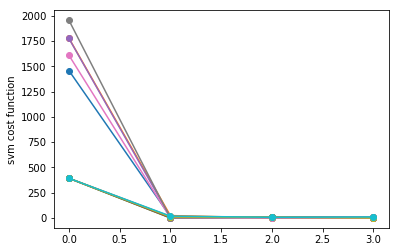

Mean run-time:0.0157212734222
Std run-time:0.019756875731
------------------------------------

Pegasos Optimization for batch-size 20
Run :: 1 training Pegasos..
Run :: 2 training Pegasos..
Run :: 3 training Pegasos..
Run :: 4 training Pegasos..
Run :: 5 training Pegasos..
Run :: 6 training Pegasos..
Run :: 7 training Pegasos..
Run :: 8 training Pegasos..
Run :: 9 training Pegasos..
Run :: 10 training Pegasos..


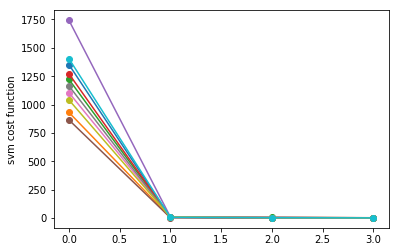

Mean run-time:0.0169626712799
Std run-time:0.0197584398105
------------------------------------

Pegasos Optimization for batch-size 200
Run :: 1 training Pegasos..
Run :: 2 training Pegasos..
Run :: 3 training Pegasos..
Run :: 4 training Pegasos..
Run :: 5 training Pegasos..
Run :: 6 training Pegasos..
Run :: 7 training Pegasos..
Run :: 8 training Pegasos..
Run :: 9 training Pegasos..
Run :: 10 training Pegasos..


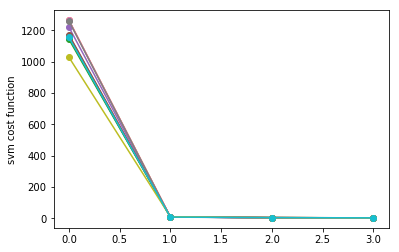

Mean run-time:0.0268792629242
Std run-time:0.0179350537305
------------------------------------

Pegasos Optimization for batch-size 1000
Run :: 1 training Pegasos..
Run :: 2 training Pegasos..
Run :: 3 training Pegasos..
Run :: 4 training Pegasos..
Run :: 5 training Pegasos..
Run :: 6 training Pegasos..
Run :: 7 training Pegasos..
Run :: 8 training Pegasos..
Run :: 9 training Pegasos..
Run :: 10 training Pegasos..


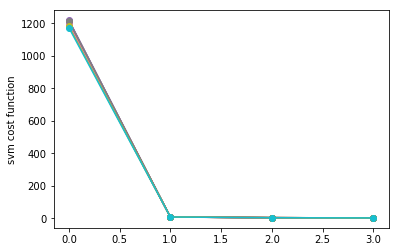

Mean run-time:0.0932848453522
Std run-time:0.027680894305
------------------------------------

Pegasos Optimization for batch-size 2000
Run :: 1 training Pegasos..
Run :: 2 training Pegasos..
Run :: 3 training Pegasos..
Run :: 4 training Pegasos..
Run :: 5 training Pegasos..
Run :: 6 training Pegasos..
Run :: 7 training Pegasos..
Run :: 8 training Pegasos..
Run :: 9 training Pegasos..
Run :: 10 training Pegasos..


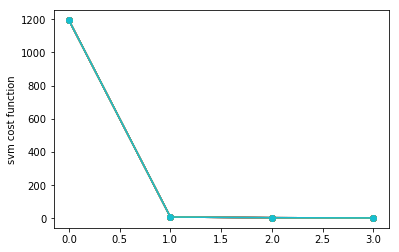

Mean run-time:0.135933041573
Std run-time:0.0348452976891
------------------------------------



In [210]:
for k in [1, 20, 200, 1000, 2000]:
    print("Pegasos Optimization for batch-size %d"%k)
    myPegasos('./MNIST-13.csv', k, 10)